# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o arquivo CSV
df_sinasc = pd.read_csv('sinasc_RO_2019.csv')

df_sinasc

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [2]:
# Crie uma função para categorizar o APGAR5
def categoria_apgar(apgar):
    if apgar >= 8:
        return 'normal'
    elif apgar >= 6:
        return 'asfixia leve'
    elif apgar >= 4:
        return 'asfixia moderada'
    else:
        return 'asfixia grave'
    
# Aplique a função a coluna APGAR5 e crie uma nova coluna 'APGAR5_CATEGORIA'
# Primeiro cria a coluna: df_sinasc['APGAR5_CATEGORIA] = 
# Depois aplica a função na coluna APGAR5: df_sinasc['APGAR5].apply(categoria_apgar)
df_sinasc['APGAR5_CATEGORIA'] = df_sinasc['APGAR5'].apply(categoria_apgar)

# Exiba as primeiras linhas do DataFrame com a nova coluna
# Abrir 2 [], pois são 2 colunas
print(df_sinasc[['APGAR5', 'APGAR5_CATEGORIA']].head())

   APGAR5 APGAR5_CATEGORIA
0    10.0           normal
1     9.0           normal
2    10.0           normal
3    10.0           normal
4    10.0           normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

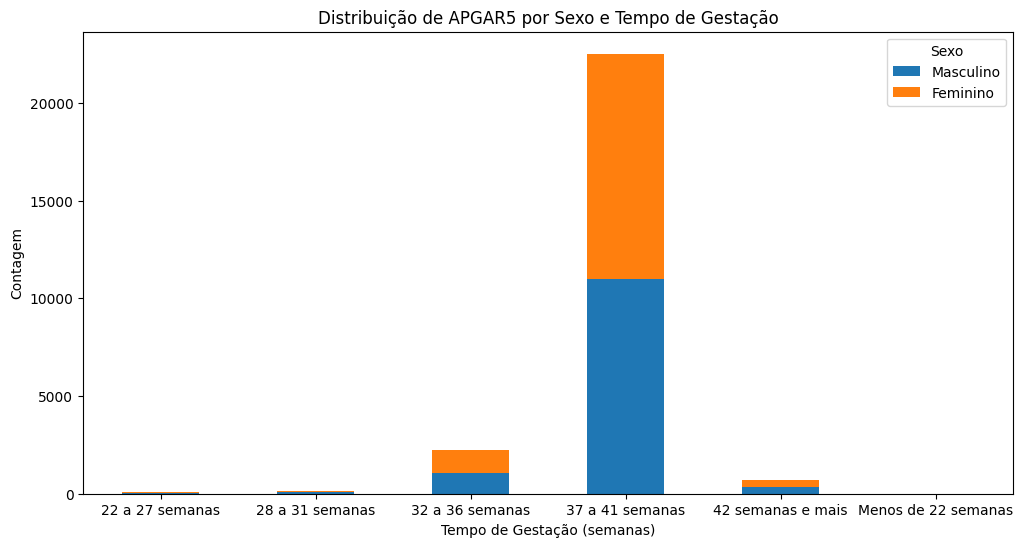

In [3]:
# Crie uma tabela dinâmica para contar as ocorrências de cada combinação de sexo e GESTACAO
# Use o metodo 'pivot_table' no df_sinasc para contar as ocorrências de cada combinação de sexo e GESTACAO
# 'pivot_table' define como os valores devem ser tratados quando existem várias entradas correspondentes a uma mesma combinação de índices
# aggfunc='count', conta o n° de ocorrências de cada combinação de indices
#  a tabela dinâmica irá contar quantas vezes cada combinação de sexo e tempo de gestação ocorre no DataFrame original.
tabela_dinamica = df_sinasc.pivot_table(index='GESTACAO', columns='SEXO', values='APGAR5', aggfunc='count')

# Plote o gráfico de barras empilhadas
ax = tabela_dinamica.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribuição de APGAR5 por Sexo e Tempo de Gestação')
plt.xlabel('Tempo de Gestação (semanas)')
plt.ylabel('Contagem')
plt.legend(title='Sexo', labels=['Masculino', 'Feminino'], loc='upper right')
plt.xticks(rotation=0)
plt.show()


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [6]:
tabela_cruzada = pd.crosstab(df_sinasc['GESTACAO'], df_sinasc['APGAR5'])
tabela_cruzada

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


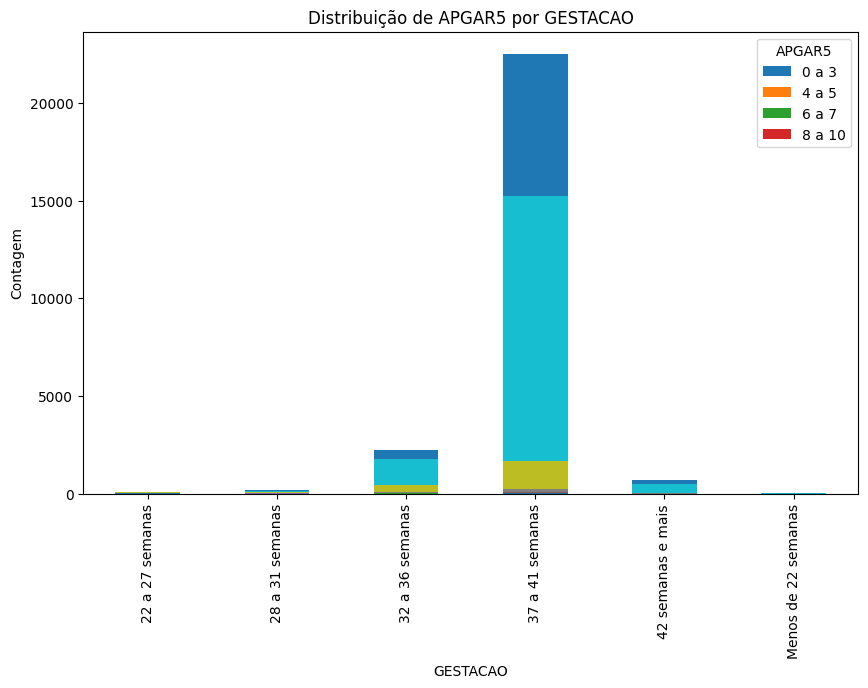

In [9]:
# Use a tabela_cruzada para criar um gráfico
tabela_cruzada

# Crie um gráfico de barras empilhadas
tabela_cruzada.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribuição de APGAR5 por GESTACAO')
plt.xlabel('GESTACAO')
plt.ylabel('Contagem')
plt.legend(title='APGAR5', loc='upper right', labels=['0 a 3', '4 a 5', '6 a 7', '8 a 10'])

plt.show()


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [10]:
# Calcule os percertuais de linha
# Metodo 'div' usado para dividir cada valor na tabela pelo total de sua linha correspondente, * 100 para ter a %
percentuais_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100

# Arredonde os valores para 2 casas decimais
percentuais_linha = percentuais_linha.round(2)

print(percentuais_linha)

APGAR5                0.0   1.0    2.0   3.0   4.0   5.0   6.0    7.0    8.0   \
GESTACAO                                                                        
22 a 27 semanas       8.24  0.00   9.41  7.06  1.18  0.00  2.35  11.76  28.24   
28 a 31 semanas       0.00  0.00   1.23  0.62  3.09  4.32  4.32   6.79  37.65   
32 a 36 semanas       0.09  0.09   0.09  0.09  0.36  0.49  0.76   2.51  16.20   
37 a 41 semanas       0.02  0.09   0.01  0.02  0.03  0.09  0.20   0.67   6.29   
42 semanas e mais     0.14  0.00   0.00  0.00  0.00  0.14  0.14   0.72   6.30   
Menos de 22 semanas  14.29  0.00  14.29  0.00  0.00  0.00  0.00  14.29   0.00   

APGAR5                9.0    10.0  
GESTACAO                           
22 a 27 semanas      22.35   9.41  
28 a 31 semanas      33.95   8.02  
32 a 36 semanas      58.50  20.81  
37 a 41 semanas      60.23  32.34  
42 semanas e mais    60.60  31.95  
Menos de 22 semanas  42.86  14.29  


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

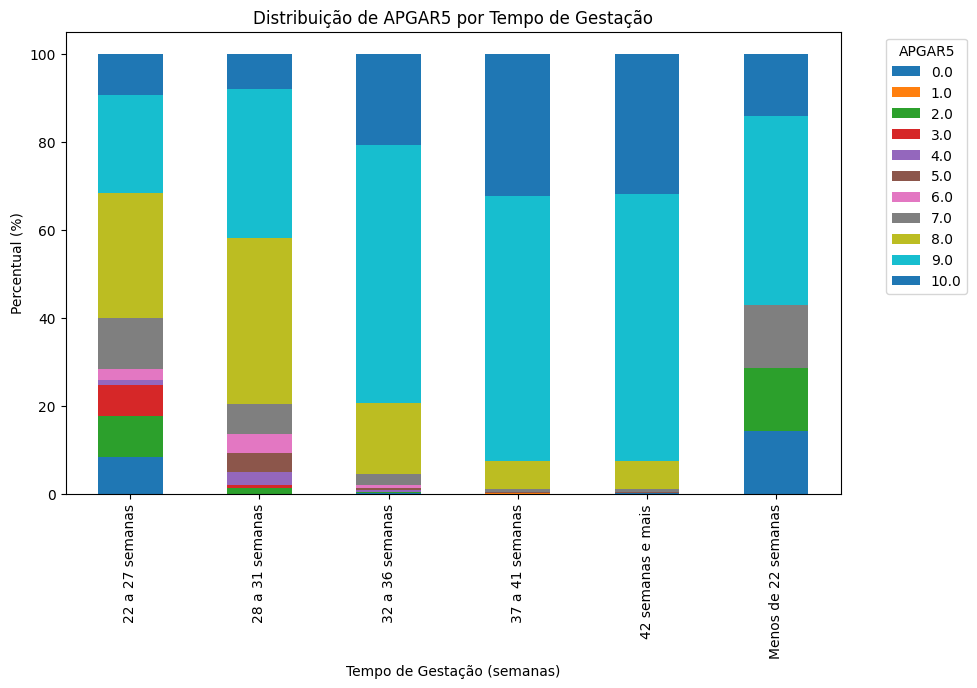

In [11]:
# Use a tabela cruzada
# Use os percentuais de linha

# Plote o gráfico de barras
ax = percentuais_linha.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribuição de APGAR5 por Tempo de Gestação')
plt.xlabel('Tempo de Gestação (semanas)')
plt.ylabel('Percentual (%)')
plt.legend(title='APGAR5', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

As barras correspondentes a gestações com menos de 37 semanas têm uma proporção significativamente maior de APGAR5 abaixo de 8, isso sugere que a afirmação dos médicos é apoiada pelos dados.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

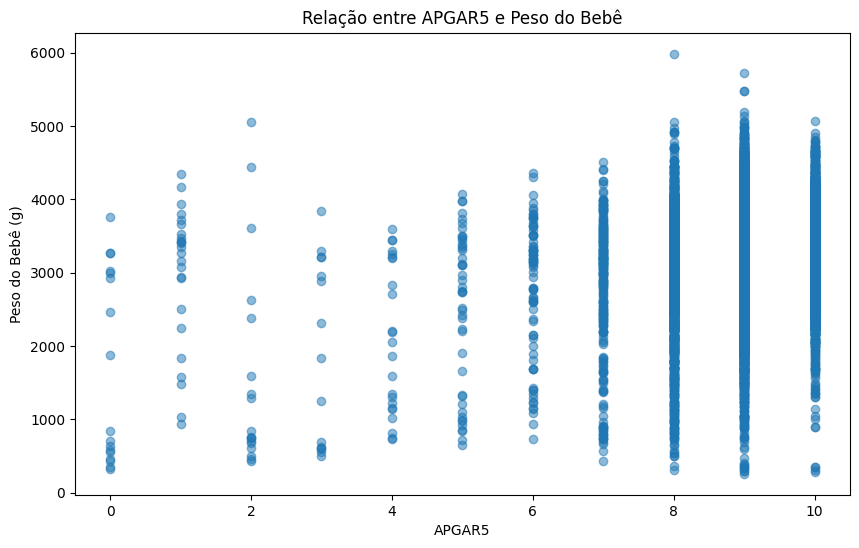

In [12]:
# Crie um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df_sinasc['APGAR5'], df_sinasc['PESO'], alpha=0.5)
plt.title('Relação entre APGAR5 e Peso do Bebê')
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê (g)')

plt.show()

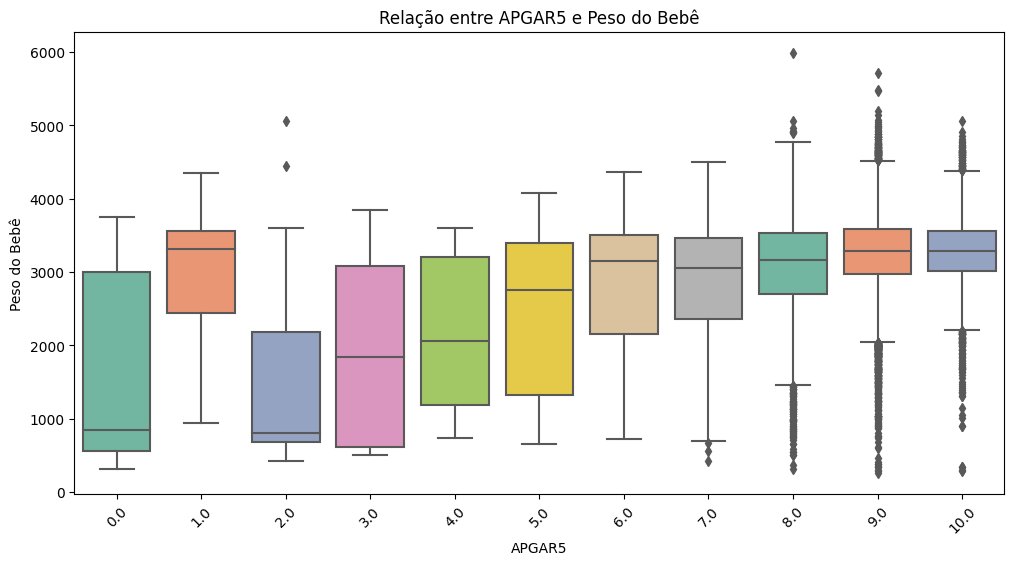

In [13]:
# Crie um boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sinasc, x='APGAR5', y='PESO', palette='Set2')
plt.title('Relação entre APGAR5 e Peso do Bebê')
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê')
plt.xticks(rotation=45)

plt.show()

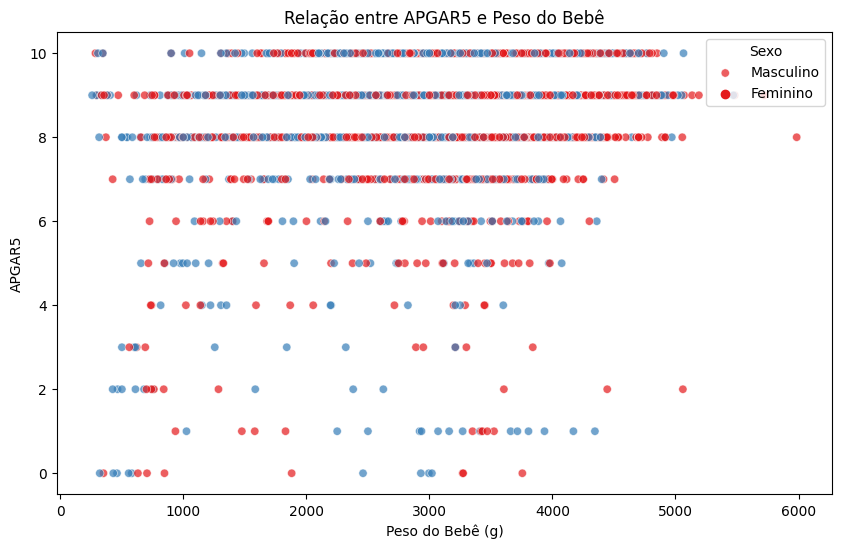

In [19]:
# Crie um gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sinasc, x='PESO', y='APGAR5', hue='SEXO', palette='Set1', alpha=0.7)
plt.title('Relação entre APGAR5 e Peso do Bebê')
plt.xlabel('Peso do Bebê (g)')
plt.ylabel('APGAR5')
plt.legend(title='Sexo', loc='upper right', labels=['Masculino', 'Feminino'])

plt.show()
